#**CHAP5.회귀**

##**1.회귀 소개**
  * 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
  * 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭함

  * 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것

  * 회귀 유형 구분
    * 독립변수 개수 > 단일 회귀 / 다중 회귀
    * 회귀 계수의 결합 : 선형 회귀 / 비선형 회귀
  
  * 지도학습
    * 분류 : 예측값이 Categorical
    * 회귀 : 예측 값이 연속값

  * 선형 회귀 모형
    * 일반 선형 회귀 : 예측값과 실제 값의 RSS를 최소화 할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델
    * 릿지 : 선형 회귀에 L2 규제를 추가한 회귀 모델. L2규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델
    * 라쏘 : 선형 회귀에 L1 규제를 적용한 방식. L2 규제가 회귀 계수 값의 크기를 줄이는데 반해, L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것
    * 엘라스틱넷 : L2,L1 규제를 함께 결합한 모델. 주로 피처가
    * 로지스틱 회귀 : 분류에 사용되는 선형 모델

##**2. 단순 선형 회귀를 통한 회귀 이해**

* 단순 선형 회귀 : 독립변수도 하나, 종속변수도 하나인 선형 회귀

* 잔차 : 실제 값과 회귀 모델의 차이에 따른 오류값
  * 최적의 회귀 모델 : 잔차의 합이 최소가 되는 모델

* RSS : 잔차 제곱 합
  * RSS를 최소로 하는 회귀 계수를 학습을 통해 찾는 것이 머신러닝 기반 회귀의 핵심 사항임.
  * 회귀에서 RSS는 비용이며 회귀 계수로 구성되는 RSS를 비용 함수라고 함.

##**3.비용 최소화하기 - 경사 하강법(Gradient Descent) 소개**

  * 고차원 방정식에 대한 문제를 해결해 주면서 비용 함수 RSS를 최소화 하는 방법을 직관적으로 제공
  * 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W파라미터를 구하는 방식
  * 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W파라미터를 지속해서 보정해 나감(W 파라미터를 업데이트)
  * 최초 W에서부터 미분을 적용한 뒤 미분 값이 계속 감소하는 방향으로 순차적으로 W를 업데이트 > 미분된 1차함수의 기울기가 감소하지 않는 지점을 비용함수가 최저인 지점으로 간주하고 그때의 w를 반환

  * 경사하강법의 일반적인 프로세스
    * STEP1 : w1,w2를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산
    * STEP2 : 업데이트 된 w = 이전 w - 학습률*편미분값
    * SETP3 : 비용 함수의 값이 감소했으면 다시 STEP2 반복, 더 이상 비용 함수의 값이 감소하지 않으면 그때의 w1,w2를 구하고 반복을 중지


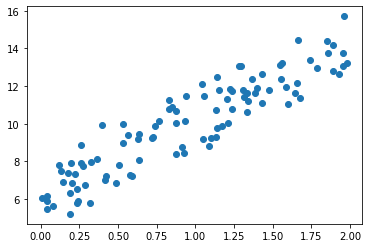

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
#y=4x+6 을 근사 (w1=4,w0=6). 임의의 값은 노이즈를 위해 만듦
X=2*np.random.rand(100,1)
y=6+4*X+np.random.randn(100,1)

#X,y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

* 비용 함수 정의

In [21]:

def get_cost(y,y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

* gradient_descent() : 경사 하강법 구현

In [22]:
#w1과 w0을 업데이트할 w1_update,w0_update를 반환

def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
  N=len(y)
  #먼저 w1_updeat, w0_update를 각각 w1,w0의 shpae와 동일한 크기를 가진 0 값으로 초기화
  w1_update=np.zeros_like(w1)
  w2_update=np.zeros_like(w0)
  #예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred=np.dot(X,w1.T)+w0
  diff=y-y_pred

  #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors=np.ones((N,1))

  #w1과 w0을 업데이트할 w1_update 와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
  w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T,diff))

  return w1_update,w0_update

In [23]:
#입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트

def gradient_descent_steps(X,y, iters=10000):
  #w0과 w1을 모두 0으로 초기화
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))

  #인자로 주어진 iters만큼 반복적으로 get_weight_updates()호출해 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update,w0_update=get_weight_updates(w1,w0,X,y,learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update

  return w1,w0

* gradient_descent_steps()를 호출해 w1과 w0구하기

* 최종적으로 RSS를 계산하는 get_cost() 함수를 생성하고 이를 이용해 경사 하강법의 예측 오류도 계산

In [24]:
def get_cost(y,y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost


w1,w0=gradient_descent_steps(X,y,iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0],w0[0,0]))
y_pred=w1[0,0]*X+w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))


w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


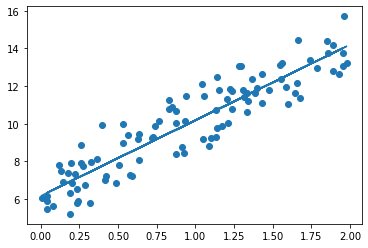

In [25]:
plt.scatter(X,y)
plt.plot(X,y_pred)

> 경사하강법을 통해 회귀선이 잘 만들어 짐

* 확률적 경사 하강법 : Stochastic Gradient Descent
  * 경사하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸림
  * 일부 데이터만 이용해 w가 업데이트 되는 값을 계산함

* stochastic_gradietn_descent_steps()
  * (미니배치)확률적 경사 하강법

In [26]:
def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))
  prev_cost=100000
  iter_index=0

  for ind in range(iters):
    np.random.seed(ind)
    #전체 X,y데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index=np.random.permutation(X.shape[0])
    sample_X=X[stochastic_random_index[0:batch_size]]
    sample_y=y[stochastic_random_index[0:batch_size]]
    #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update,w0_update=get_weight_updates(w1,w0,sample_X,sample_y, learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update

  return w1,w0

In [27]:
w1,w0=stochastic_gradient_descent_steps(X,y,iters=1000)
print("w1:",round(w1[0,0],3), "w0:",round(w0[0,0],3))
y_pred=w1[0,0]*X+w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


* 피처가 M개인 경우 회귀 계수 M+1개 > 선형대수로 계산

##**5. 다항 회귀와 과(대)적합/과소적합 이해**

* 다항 회귀 : 회귀가 독립 변순의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것

* 다항 회귀는 선형 회귀
  * 회귀에서 선형/비선형회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관함

* 사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않음
  * 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현함
  * PolynomialFeatures : degree 파라미터를 통해 입력 받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환함
  

In [29]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2*2 행렬 생성
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n',X)

#degree=2인2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly=PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr=poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n',poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


* 3차 다항 회귀 함수를 임의로 설정하고 이의 회귀 계수를 예측

In [30]:
def polynomial_func(X):
  y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y

X=np.arange(4).reshape(2,2)
print('일차 단항식 곘루 feature:\n',X)
y=polynomial_func(X)
print('삼차 다항식 결정값:\n',y)

일차 단항식 곘루 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


* 일차 단항식 계수를 삼차 다항식 계수로 변환하고, 이를 선형 회귀에 적용하면 다항 회귀로 구현됨

In [33]:
from sklearn.linear_model import LinearRegression
# 3차 다항식 변환
poly_ftr=PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n',poly_ftr)

#Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model=LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n',np.round(model.coef_,2))
print('Polynomial 회귀 Shape :',model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


> 3차 다항식 Polynomial 변환 이후에는 다항식 계수 피처가 10개로 늘어남

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y

#Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model=Pipeline([('poly',PolynomialFeatures(degree=3)),('linear',LinearRegression())])
X=np.arange(4).reshape(2,2)
y=polynomial_func(X)

model=model.fit(X,y)
print('Polynomial 회귀 계수\n',np.round(model.named_steps['linear'].coef_,2))


Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


###1) 다항 회귀를 이용한 괄소적합 및 과적합 이해

* 다항 회귀의 차수를 높이면 피처의 직선적 관계가 아닌 복잡한 다항 관계 모델링 가능
* 다항 회귀의 차수가 높아질수록 학습 데이터에만 너무 맞춘 학습이이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측정확도가 떨어짐



* 원래 데이터 세트는 피처 X와 target y가 노이즈가 포함된 다항식의 코사인 그래프 관계를 가지도록 만들어줌

* 이에 기반해 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

#임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
  return np.cos(1.5*np.pi*X)

#X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples=30
X=np.sort(np.random.rand(n_samples))

#y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동값을 더한 값
y=true_fun(X)+np.random.randn(n_samples)*0.1



* 예측 결과를 비교할 다항식 차수를 각각 1,4,15로 변경하면서 예측 결과를 비교


Degree 1 회귀 계수는 [-1.61]입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26]입니다.
Degree 4 MSE는 0.043208749872320706 입니다.

Degree 15 회귀 계수는 [-2.98291000e+03  1.03898770e+05 -1.87415056e+06  2.03715126e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08]입니다.
Degree 15 MSE는 180526263.3177066 입니다.


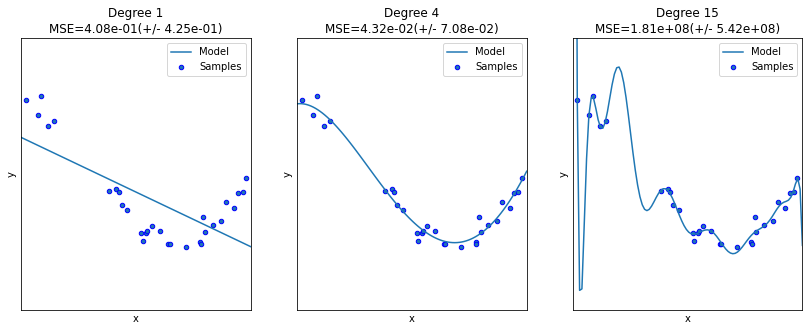

In [40]:
plt.figure(figsize=(14,5))
degrees=[1,4,15]

#다항 회귀의 차수(degree)를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
  ax=plt.subplot(1,len(degrees),i+1)
  plt.setp(ax,xticks=(),yticks=())

  #개별 degree별로 Polynomial 변환
  polynomial_features=PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression=LinearRegression()
  pipeline=Pipeline([('polynomial_featrues',polynomial_features),
                     ('linear_regression', linear_regression)])
  pipeline.fit(X.reshape(-1,1),y)

  # 교차 검증으로 다항 회귀를 평가
  scores=cross_val_score(pipeline,X.reshape(-1,1),y,scoring='neg_mean_squared_error',cv=10)
  #Pipeline을 구성하는 세부 객체를 접근하는 named_seps['객체명']을 이용해 회귀 계수 추출
  coefficients=pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1}입니다.'.format(degrees[i],np.round(coefficients,2)))
  print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

  #0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측 수행
  #테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
  X_test=np.linspace(0,1,100)
  #예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label="Model")
  plt.scatter(X,y,edgecolor='b',s=20,label="Samples")

  plt.xlabel("x")
  plt.ylabel("y")
  plt.xlim((0,1))
  plt.ylim((-2,2))
  plt.legend(loc="best")
  plt.title("Degree {}\nMSE={:.2e}(+/- {:.2e})".format(degrees[i],-scores.mean(),scores.std()))

plt.show()



> 맨왼쪽의 Degree1 예측 곡선은 단순한 직선으로 단순 선형 회귀와 같음. 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기에는 너무 단순해 보임

> 두번째 Degree4 예측 곡선은 실제 데이터 세트와 유사한 모습

> 세번째 Degree15 예측 곡선은 MSE값이 매우 큼 (과적합)

###2) 편향-분산 트레이드 오프 (Bias-Variance Trade off)

* 고편향 : 매우 단순화된 모델로서 지나치게 한 반향성으로 치우침

* 고분산 : 매우 복잡한 모델로서 지나치게 높은 변동성을 가짐

* 저편향/저분산 : 예측 겨로가가 실제 결과에 매우 잘 근접하면서도 예측 변동이 크지 않고 특정 부분에 집중됨

* 저편향/고분산 : 예측 결과가 실제 결과에 비교적 근접하지만, 예측 결과가 실제 결과를 중심으로 꽤 넓은 부분에 분포되어 있음

* 고편향/저분산 : 정확한 결과에서 벗어나면서도 예측이 특정 부분에 집중됨

* 고편향/고분산 : 정확한 예측 결과를 벗어나면서도 넓은 부분에 분포됨

* 일반적으로 편향과 분산은 한 쪽이 높으면 한쪽이 낮아지는 경향

* 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 골디락스 지점 > 이후로 분산을 지속적으로 높이면 전체 오류 값이 오히려 증가하면서 예측 성능은 다시 저하됨

* 고편향/저분산에서 과소적합되기 쉬우며 저편향/고분산에서 과적합되기 쉬움

* 편향과 분산이 서로 트레이트오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법.